# Kernel CSDA

Siguendo a Potworosky et al, vamos a implementar el kCSDA aquí y tratar de hacer que funcione bien.


### Problema 1 a) Calcular $b_j (x_k)$

Usa tu cabeza chico: en realidad sólo necesitas una TABLOTA de los valores de la integral resuelta, de forma que cubra toda la matriz para cualquier $x_k$ válido que escogas, lo que haría que *"solo"* tuvieras que resolver los valores para una malla de $129·129$ puntos o algo asi: pero tienes simetría rotacional respecto al centro $j$-
ésimo, así que en realidad puedes reducir esto bastante: calculemos esto en una rebanada de un octavo de cuadrado (un cuadrante de la matriz reducido a la mitad). Para "ahorrarme" trabajo después copiare los resultados en todos los octantes y guardare la tabla como una matrizota.

In [1]:
#Constantes
#Las unidades de distancia estan en unidades de distancia inter electrodos:  
#1 u.a.=42 µm
sigma=1.0
h=8+1/3  #350/42
radio=5.0 

5.0

Pero antes... quiero ver como se VE la función que voy a integrar.

In [2]:
using PyPlot

In [3]:
function duro(x::Number)
    if abs(x)<radio
        return 1.0
    else
        return 0
    end
end


function suave(x::Number)
    result=exp(-x^2/(2*radio))
    return result
end

function bkerneldura(x::Number)
    xcero=1
        result=asinh(h/sqrt((x-xcero)^2))*duro(x)
    return result
end

function bkernelsuave(x::Number)
    xcero=1
    result=asinh(h/sqrt((x-xcero)^2))*suave(x)
    return result
end



bkernelsuave (generic function with 1 method)

In [4]:
xxs=-10:0.02:10
yys=map(bkerneldura,xxs);
otrayys=map(bkernelsuave,xxs);

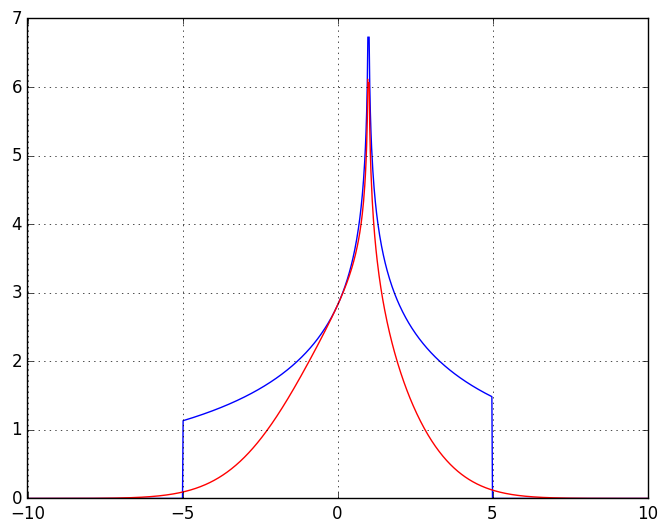

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd7ec8f12b0>

In [5]:
grid(true)
plot(xxs,yys,c="blue")
plot(xxs,otrayys,c="red")


Bien. Parece que los dos se parecen mucho cerca de la singularidad, y que no hay nada que ver después de 2 distancias de R, en la imagen de arriba tenemos que R=2, xcero=1, h=1. 

In [6]:
function distancia2d(x1::Number,y1::Number,x2::Number,y2::Number)
    result=sqrt((x1-x2)^2+(y1-y2)^2)
    return result
end

function distancia2d(x1::Array,x2::Array)
    result=distancia2d(x1[1],x1[2],x2[1],x2[2])
    return result
end

distancia2d (generic function with 2 methods)

In [7]:
a=[1.0,2.0]

b=[0.0,0.0]

2-element Array{Float64,1}:
 0.0
 0.0

In [8]:
distancia2d(0.1,2,0.7,0.1)

1.9924858845171274

In [9]:
distancia2d(a,b)

2.23606797749979

In [10]:
function duro2D(x1::Number,y1::Number)
    if distancia2d(x1,y1,0,0)<=radio
        return 1.0
    else
        return 0
    end
end
    
function suave2D(x1::Number,y1::Number)
    result=exp(-distancia2d(x1,y1,0,0)/(2*radio))
    return result
end
   

function bKernelDuro2D(x1::Number,y1::Number, x2::Number,y2::Number)
    #=
    Acuerdate: Estos estan centrados en el origen, despues los vamos trasla<dando 
    sea necesario 
    =#
    dist=distancia2d(x1,y1,x2,y2)
    result=asinh(h/dist)*duro2D(x2,y2)
    return result
end

function bKernelSuave2D(x1::Number,y1::Number, x2::Number,y2::Number)
    #=
    Acuerdate: Estos estan centrados en el origen, despues los vamos trasla<dando 
    sea necesario 
    =#
    dist=distancia2d(x1,y1,x2,y2)
    result=asinh(h/dist)*suave2D(x2,y2)
    return result
end


bKernelSuave2D (generic function with 1 method)

In [11]:
xefecto=[1.0,0.50]
xobservador=[13.0,15.0]

2-element Array{Float64,1}:
 13.0
 15.0

In [12]:
xxs=-63:63
yys=-63:63

-63:63

In [13]:
matrizevaluacionobservadores=zeros(127,127);
matrizevaluacioncausantesres=zeros(127,127);
for j in 1:127, k in 1:127
    zz1=bKernelDuro2D(xxs[j],yys[k], xefecto[1],xefecto[2])
    matrizevaluacionobservadores[k,j]=zz1
    zz2=bKernelDuro2D(xobservador[1],xobservador[2],xxs[j],yys[k])
        matrizevaluacioncausantesres[k,j]=zz2    
end

In [14]:
matrizevaluacioncausantesres[55:70,55:70]

16x16 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.378984  0.0       0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.330529     0.394398  0.403082  0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.340031     0.41086   0.420708  0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.349784     0.428438  0.439645  0.0       0.0
 0.0  0.0  0.0  0.0  0.348557  0.359757     0.447195  0.459991  0.472426  0.0
 0.0  0.0  0.0  0.0  0.0       0.369904  …  0.467184  0.481839  0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.380167     0.488438  0.505271  0.0       0.0
 0.0  0.0  0.0  0.0  0.0       0.390476 

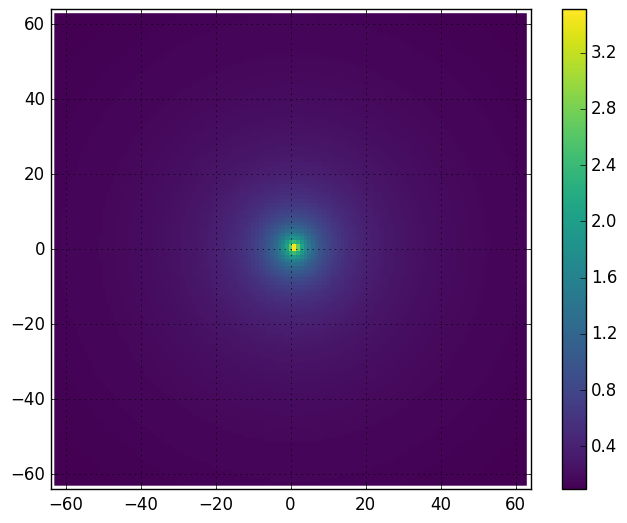

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd7ec797c50>

In [15]:
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(matrizevaluacionobservadores, origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

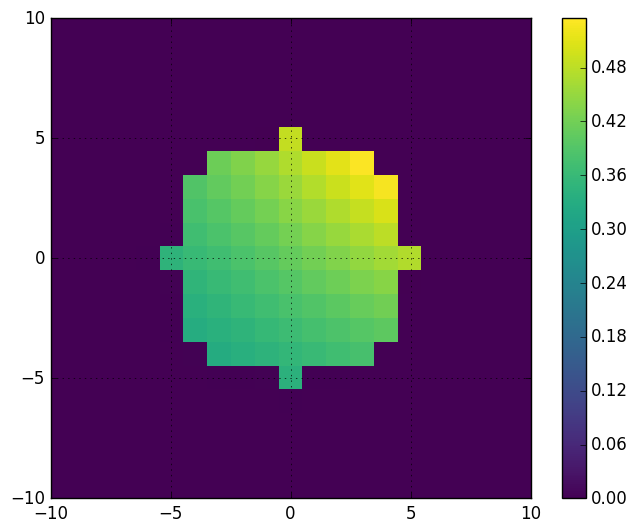

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd7ec70fc50>

In [16]:
xlim(-10,10)
ylim(-10,10)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(matrizevaluacioncausantesres, origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [17]:
matrizevaluacioncausantesres[1,1]

0.0

Bueno, hasta aquí parece que vamos bien: Ahora fijamos las $x$ del Observador e integremos la chiva respecto a las fuentes.

In [18]:
using Cubature

In [19]:
#En este caso el soporte de la integral esta contenido en una bola en 
@time hcubature(x ->
    bKernelDuro2D(xobservador[1],xobservador[2], x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.001)

  0.285184 seconds (891.42 k allocations: 19.741 MB, 1.66% gc time)


(32.28665446500188,0.032282198933576756)

In [24]:
@time hcubature(x ->
    bKernelDuro2D(0.001,0.001, x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.001)

  0.039593 seconds (498.67 k allocations: 9.894 MB)


(137.08928619641262,0.1369542093864979)

In [31]:
limint=22*radio #Suficiente: nada se ve mucho mas lejos que esto (depende de h)

@time (chula,errir)=hcubature(x ->
bKernelSuave2D(xobservador[1],xobservador[2], x[1],x[2]),
[-limint,-limint],[limint,limint],reltol=0.00001)

  0.016991 seconds (122.20 k allocations: 2.294 MB)


(247.22994979750572,0.0024486385140618486)

In [30]:
bcerodura=zeros(127,127)
bcerosuave=zeros(127,127);

In [37]:
#Evaluemos solo la parte de medio cuadrante superior de la matriz. 
#El resto lo obtenemos por reflecciones.
#Por convenciencia, evaluemos la matriz completa sobre -64:64^2
# El "origen" de la Matriz está en en [64,64]
#Por alguna razón el kernel de bordes duros es MUCHO mas lento de evaluar
#que el gaussiano.


@time for j in 64:66, k in 64:j

    (zz1,pupu)=hcubature(x ->
    bKernelDuro2D(xxs[j],yys[k], x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.0001)
    bcerodura[k,j]=zz1
    #=
    (zz2,pupu)=hcubature(x ->
    bKernelSuave2D(xxs[j],yys[k], x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.00001)
    bcerosuave[k,j]=zz2
    =#
end

  2.103883 seconds (26.31 M allocations: 521.816 MB, 2.06% gc time)


In [84]:
#las simetrias para rellenar la matriz.
#=
for j in 64:127, k in 64:j
    bcerodura[j,k]=bcerodura[k.j]
    bcerosuave[j,k]=bcerosuave[k.j]
end
=#

0

In [87]:
#writedlm("BceroDura.dat", bcerodura)
#writedlm("BceroSuave.dat", bcerosuave)

In [44]:
bcerodura=readdlm("BceroDura.dat");
bcerosuave=readdlm("BceroSuave.dat");


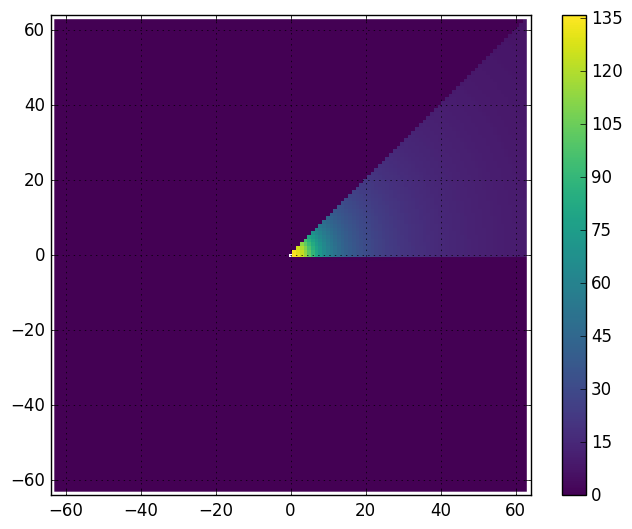

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbbc6b3ca90>

In [45]:
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(bcerodura,origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [52]:
for j in 64:127, k in 64:j
    bcerodura[j,k]=bcerodura[k,j]
    bcerosuave[j,k]=bcerosuave[k,j]
end

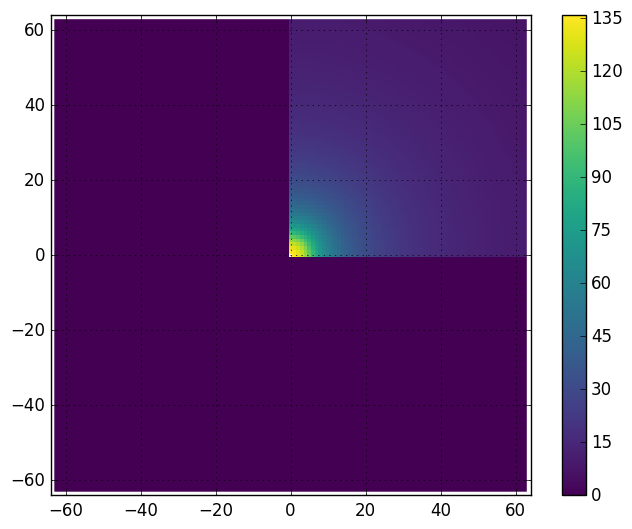

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbbc6be71d0>

In [43]:
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(bcerodura,origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [60]:
for j in 64:127, k in 64:127
    bcerodura[127-k+1,127-j+1]=bcerodura[k,j]
    bcerodura[127-k+1,j]=bcerodura[k,j]
    bcerodura[k,127-j+1]=bcerodura[k,j]
    
    bcerosuave[127-k+1,127-j+1]=bcerosuave[k,j]
    bcerosuave[127-k+1,j]=bcerosuave[k,j]
    bcerosuave[k,127-j+1]=bcerosuave[k,j]
end

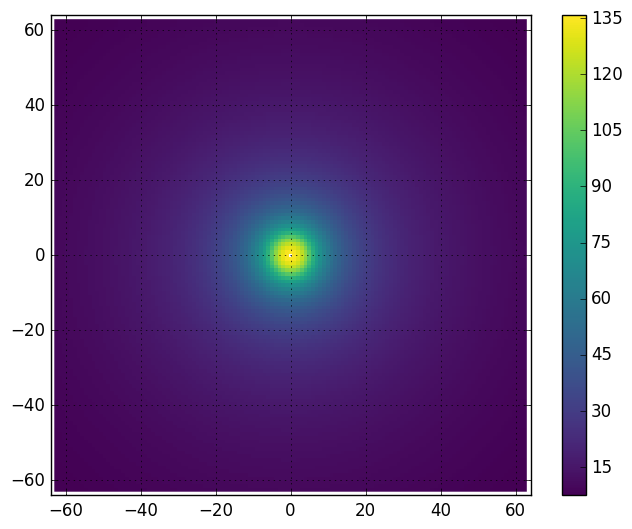

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbbc62dfd68>

In [65]:
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(bcerodura,origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [63]:
bcerosuave-bcerodura

127x127 Array{Float64,2}:
 -0.899447  -0.906588  -0.913788  …  -0.913788  -0.906588  -0.899447
 -0.906588  -0.913904  -0.921277     -0.921277  -0.913904  -0.906588
 -0.913788  -0.921277  -0.928833     -0.928833  -0.921277  -0.913788
 -0.921038  -0.928711  -0.936448     -0.936448  -0.928711  -0.921038
 -0.928338  -0.936197  -0.944128     -0.944128  -0.936197  -0.928338
 -0.935688  -0.943737  -0.951862  …  -0.951862  -0.943737  -0.935688
 -0.943085  -0.951328  -0.959653     -0.959653  -0.951328  -0.943085
 -0.950527  -0.958968  -0.967498     -0.967498  -0.958968  -0.950527
 -0.958012  -0.966656  -0.975394     -0.975394  -0.966656  -0.958012
 -0.965536  -0.974387  -0.983338     -0.983338  -0.974387  -0.965536
 -0.973098  -0.98216   -0.99133   …  -0.99133   -0.98216   -0.973098
 -0.980693  -0.989972  -0.999364     -0.999364  -0.989972  -0.980693
 -0.98832   -0.997819  -1.00744      -1.00744   -0.997819  -0.98832 
  ⋮                               ⋱              ⋮                  
 -0.9806

In [66]:
writedlm("BceroDura.dat", bcerodura)
writedlm("BceroSuave.dat", bcerosuave)